In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from math import sqrt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print("Dataset Preview:\n", dataset.head())

Dataset Preview:
    Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:
print(dataset.columns)

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [4]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

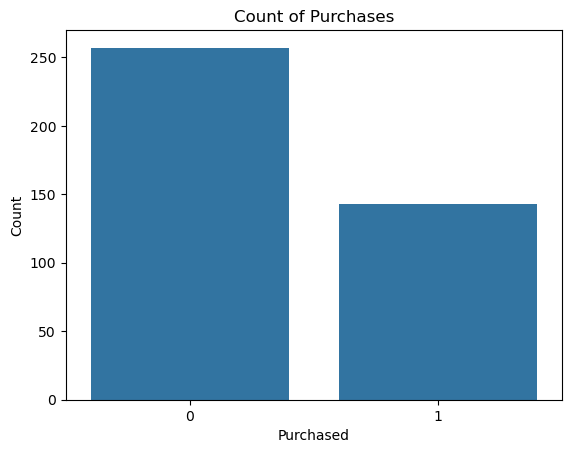

In [5]:
sns.countplot(x='Purchased', data=dataset)
plt.title('Count of Purchases')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [9]:
def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)

def knn_minkowski_distance(X_train, y_train, X_test, k, p):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            # calculate the distance
            dist = minkowski_distance(X_test[i], X_train[j], p)
            distances.append((dist, y_train[j]))
        distances.sort()  # sort based on distance
        # get the k nearest neighbors
        neighbors = distances[:k]
        # count the votes for each class
        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        # get the class with the most votes
        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)
    return y_pred

In [13]:
k = 5
p = 2  
y_pred = knn_minkowski_distance(X_train, y_train, X_test, k, p)

In [14]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

Confusion Matrix:
 [[55  3]
 [ 1 21]]
Accuracy Score: 0.95


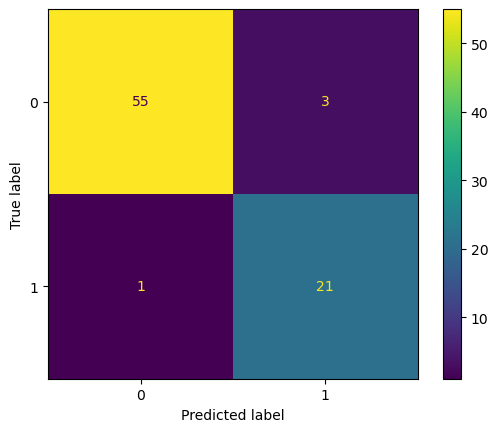

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [67]:
def plot_knn_decision_boundary(X_set, y_set, title, X_train_ref, y_train_ref, k=5, p=2, step=0.1):
    from matplotlib.colors import ListedColormap

    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=step)
    )

    grid_points = np.c_[X1.ravel(), X2.ravel()]
    print(f"Predicting {len(grid_points)} points for decision boundary...")

    Z = knn_minkowski_distance(X_train_ref, y_train_ref, grid_points, k=k, p=p)
    Z = np.array(Z).reshape(X1.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='red', label='Not Purchased')
    plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='green', label='Purchased')
    plt.title(title)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.legend()
    plt.show()

Predicting 3660 points for decision boundary...


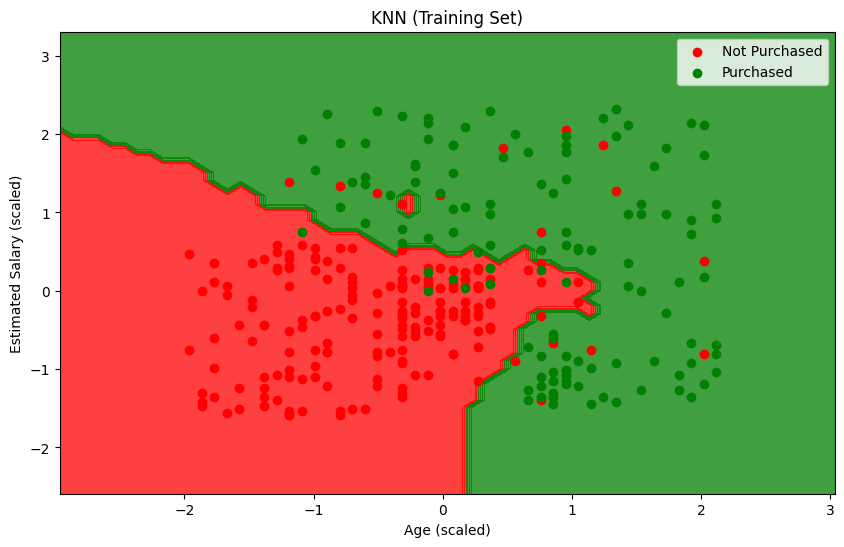

Predicting 3660 points for decision boundary...


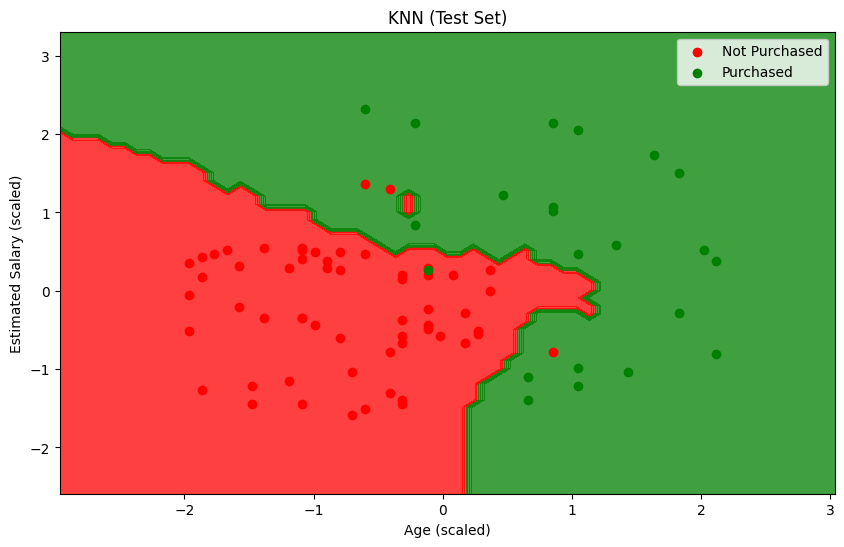

In [69]:
plot_knn_decision_boundary(X_train, y_train, 'KNN (Training Set)', X_train, y_train, k=5, p=2)
plot_knn_decision_boundary(X_test, y_test, 'KNN (Test Set)', X_train, y_train, k=5, p=2)